In [31]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import corner

plt.style.use('~/vedant.mplstyle')

In [32]:
from astropy.table import Table

In [33]:
cat = 'mage'
ver = 'V0.01'

In [34]:
samplef = '/n/holyscratch01/conroy_lab/vchandra/mage/samples/%s/%s/' % (cat, ver)

In [47]:
files = np.sort(glob.glob(samplef + '*'))

In [48]:
acat_id = 65

In [49]:
acat = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/catalogs/%s_acat.fits' % cat)

In [55]:
source = acat[acat['ACAT_ID'] == acat_id]['GAIAEDR3_ID'][0]

In [56]:
for file in files:
    if str(source) in file:
        break

In [57]:
print(file)

/n/holyscratch01/conroy_lab/vchandra/mage/samples/mage/V0.01/mage_2343212561879206272_2022_08_04_V0.01_samp.dat


In [73]:
samp = Table.read(file,format='ascii')

In [74]:
samp['Pr'] = np.exp(samp['log(wt)']-samp['log(z)'][-1])
samp = samp[samp['Pr'] > 1E-10]

In [75]:
np.sum(~np.isfinite(samp['Pr']))

0

In [76]:
pcol = ['Vrad', 'Vrot', 'Dist', 'Av', 'EEP', '[Fe/H]', '[a/Fe]', 'pc_0', 'pc_1', 'pc_2', 'pc_3', 'Teff', 'log(g)']

In [77]:
samp[pcol]

Vrad,Vrot,Dist,Av,EEP,[Fe/H],[a/Fe],pc_0,pc_1,pc_2,pc_3,Teff,log(g)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-126.46286167604336,234.65332975652998,130604.68488985935,0.025725080775483182,529.6455002549138,-0.6016348506215454,0.5856021087367577,1.8458520492015893,0.18279939815738053,-0.43969701888541346,-0.061078668805093814,4439.008589775765,2.3400272970199674
308.70633574141607,58.76257581428528,124868.46682909738,0.025409731244817466,634.2266447308963,-1.3858544893108926,0.27761399326695113,0.5171360088645686,0.2128479911431446,0.06305842419682388,-0.12851541097669777,5369.483115062685,2.524663803114703
-408.92063624189234,36.64941341759713,86556.28221937476,0.031582402228884636,419.15445020807783,-0.8166429527218244,0.4735060697177021,0.9802126933792751,0.1780114501446262,-0.20298482326932407,-0.12922097341045355,6551.016800510015,4.098119603735537
381.78942100631696,165.88661133768667,34219.145491793024,0.03499014916881655,751.2018434551437,-3.693162437318052,0.2924799468294883,1.767075195833141,0.3245879218485928,0.5882419104776027,0.013959741647038832,5110.992997836097,1.8588343199119295
62.32228114662064,49.71945986027365,88616.82748106736,0.0346065009921674,796.2251732306014,-3.530111410746416,-0.14457100474090387,0.9088788502516654,-0.7617924967360483,0.04893007878107915,-0.17298020423255786,4792.454783451373,1.3330826272791956
251.61419514842635,30.33983497068722,168845.931430919,0.029579437383164348,806.9888434527039,-3.45907930704823,0.2960122029502565,1.4598430574295125,-0.5229147693933621,0.2851089953965482,0.05493519837783205,4818.922815922509,1.20712267786035
239.49169680810735,56.638062431361924,138771.352969301,0.03164111771733395,791.2063897610122,-2.7521042228477954,0.45944843798184226,1.3587324881450904,0.05617681580629936,0.14628598981765287,0.16905567414951897,4712.590527294614,1.2770970213143362
-356.3195781385092,44.61495094360247,192325.23921473714,0.03450283846189201,510.32803029003855,-2.0002564251119197,0.050302110645407586,0.9052596788227234,0.5380188967838346,-0.07395945776811136,-0.09252277217532513,6390.930786388523,3.093881740123562
-251.51848675047518,28.899254549620533,67774.88243699157,0.028644013927014045,661.8311821557188,-1.5264266267720907,0.43273796954448707,1.4350946682365153,0.2187172818848744,0.7801359996620869,0.0010745379481378705,5342.692973642653,2.42371009721661


In [78]:
samp

Iter,Vrad,Vrot,Dist,Av,EEP,initial_[Fe/H],initial_[a/Fe],initial_Mass,pc_0,pc_1,pc_2,pc_3,Inst_R,Teff,log(g),log(R),[Fe/H],[a/Fe],log(Age),Mass,log(L),Agewgt,log(lk),log(vol),log(wt),h,nc,log(z),delta(log(z)),Pr
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
0,-126.46286167604336,234.65332975652998,130604.68488985935,0.025725080775483182,529.6455002549138,-0.6101705546780005,0.5791518783422309,1.3227292169901188,1.8458520492015893,0.18279939815738053,-0.43969701888541346,-0.061078668805093814,nan,4439.008589775765,2.3400272970199674,1.1093531820079527,-0.6016348506215454,0.5856021087367577,9.544260988823252,1.3207181092031808,1.761332632769772,4.873668760278304e-05,-1e+300,-0.001998002662673058,-1e+300,-1.996007984031923e+297,2,-1e+300,1e+300,0.0
1,308.70633574141607,58.76257581428528,124868.46682909738,0.025409731244817466,634.2266447308963,-1.3958062455849438,0.27117846505379223,1.4986382799728806,0.5171360088645686,0.2128479911431446,0.06305842419682388,-0.12851541097669777,nan,5369.483115062685,2.524663803114703,1.0422239441180658,-1.3858544893108926,0.27761399326695113,9.210836106845914,1.4830043295629558,1.957660139447291,9.718874169497915e-10,-1e+300,-0.003996005325346116,-1e+300,-3.988031920191636e+297,9,-1e+300,1e+300,0.0
2,-408.92063624189234,36.64941341759713,86556.28221937476,0.031582402228884636,419.15445020807783,-0.605584003102654,0.43828908758994706,1.1740996789814293,0.9802126933792751,0.1780114501446262,-0.20298482326932407,-0.12922097341045355,nan,6551.016800510015,4.098119603735537,0.20459700231003936,-0.8166429527218244,0.4735060697177021,9.558922053302036,1.1736061492139152,0.6279111845544366,0.0004122690652533519,-1e+300,-0.005994007988019174,-1e+300,-5.976079760670392e+297,9,-1e+300,1e+300,0.0
3,381.78942100631696,165.88661133768667,34219.145491793024,0.03499014916881655,751.2018434551437,-3.6866668655849217,0.28641191587373316,0.977944209575204,1.767075195833141,0.3245879218485928,0.5882419104776027,0.013959741647038832,nan,5110.992997836097,1.8588343199119295,1.280315604381398,-3.693162437318052,0.2924799468294883,9.787548893955288,0.958785880799064,2.3481346797111815,1.2425097777559364e-06,-1e+300,-0.007992010650692232,-1e+300,-7.960159441786875e+297,4,-1e+300,1e+300,0.0
4,62.32228114662064,49.71945986027365,88616.82748106736,0.0346065009921674,796.2251732306014,-3.5359205283398647,-0.15105342140155456,1.2240399449048576,0.9088788502516654,-0.7617924967360483,0.04893007878107915,-0.17298020423255786,nan,4792.454783451373,1.3330826272791956,1.5942043335042855,-3.530111410746416,-0.14457100474090387,9.478498636275486,1.2125558619798071,2.8641230902023502,1.0084637514988025e-06,-1e+300,-0.00999001331336529,-1e+300,-9.940278884018877e+297,2,-1e+300,1e+300,0.0
5,251.61419514842635,30.33983497068722,168845.931430919,0.029579437383164348,806.9888434527039,-3.4745972690944775,0.28633942589286426,1.6960604657002174,1.4598430574295125,-0.5229147693933621,0.2851089953965482,0.05493519837783205,nan,4818.922815922509,1.20712267786035,1.7288315389432964,-3.45907930704823,0.2960122029502565,9.084127506422995,1.6861983332858426,3.1429452862497635,1.6138764924882196e-06,-1e+300,-0.011988015976038347,-1e+300,-1.191644599203482e+298,8,-1e+300,1e+300,0.0
6,239.49169680810735,56.638062431361924,138771.352969301,0.03164111771733395,791.2063897610122,-2.7569020318879156,0.4532408459802845,1.1217030952923415,1.3587324881450904,0.05617681580629936,0.14628598981765287,0.16905567414951897,nan,4712.590527294614,1.2770970213143362,1.6015163557431704,-2.7521042228477954,0.45944843798184226,9.594538963529653,1.102439423724432,2.849553862366472,8.286998798978788e-07,-1e+300,-0.013986018638711404,-1e+300,-1.388866865472543e+298,4,-1e+300,1e+300,0.0
7,-356.3195781385092,44.61495094360247,192325.23921473714,0.03450283846189201,510.3280302900

In [79]:
samples = np.lib.recfunctions.structured_to_unstructured(np.array(samp[pcol]))

In [80]:
np.sum(~np.isfinite(samples.ravel()))

4

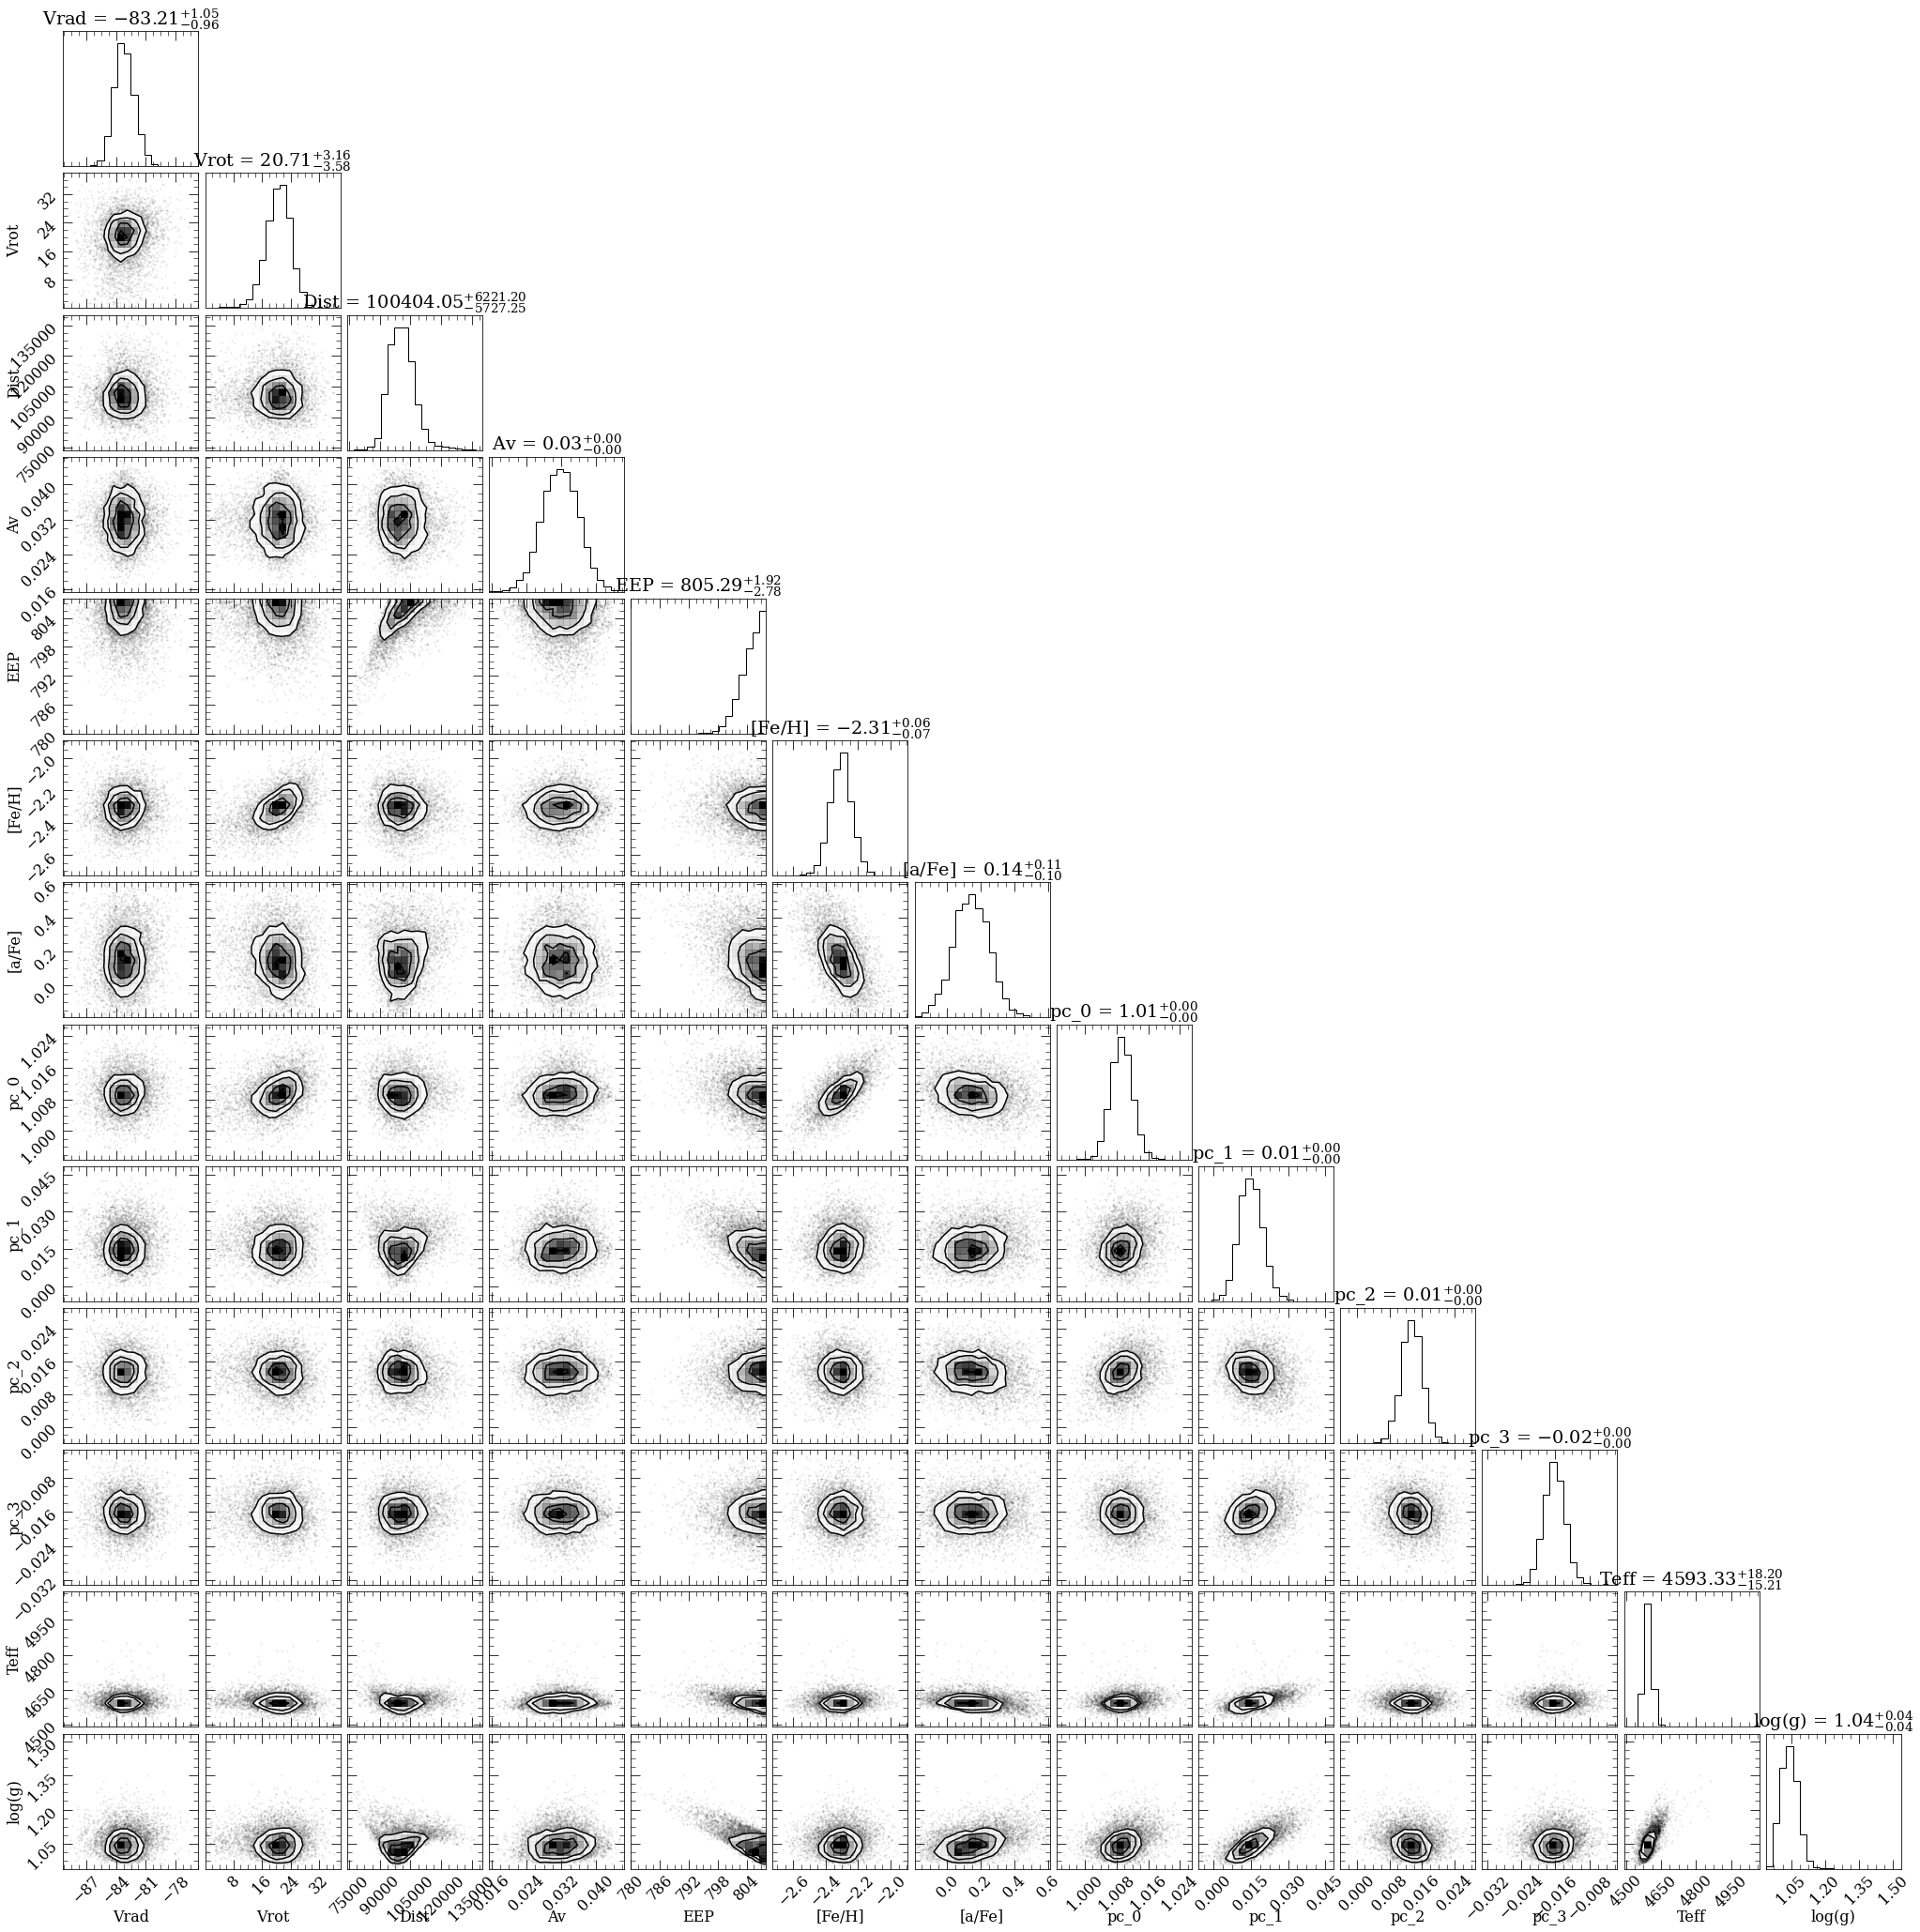

In [65]:
f = corner.corner(samples, labels = pcol, weights = samp['Pr'], show_titles = True);